<a href="https://colab.research.google.com/github/WasudeoGurjalwar/AL_ML_Assignments/blob/main/Rain_Prediction_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [412]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
df = pd.read_csv('imd_monthly_train.csv', compression='gzip')
df.head()


,pos,monthID,rain_sum,rain_mean,rain_std,tmin_mean,tmin_std,tmax_mean,tmax_std
0,"(10.5, 76.5)",1,5.298247,0.170911,0.951593,17.139032,0.995635,28.302258,0.769761
1,"(10.5, 77.5)",1,30.434262,0.981750,3.753896,17.600968,0.961833,28.270968,1.129780
2,"(10.5, 78.5)",1,34.014397,1.097239,3.222228,20.922581,0.974286,30.406452,1.234962
3,"(10.5, 79.5)",1,284.678233,9.183169,22.217352,21.787419,0.980483,29.621613,1.035568
4,"(11.5, 75.5)",1,19.827823,0.639607,2.764289,18.292903,1.010855,29.275161,0.657165


In [413]:
df['month'] = df.apply(lambda row: row['monthID']%12, axis=1)
df.head()
df.tail()

,pos,monthID,rain_sum,rain_mean,rain_std,tmin_mean,tmin_std,tmax_mean,tmax_std,month
71971,"(35.5, 77.5)",240,0.000000,0.000000,0.000000,-0.950856,1.435379,9.051020,2.789874,0
71972,"(8.5, 77.5)",240,170.252570,5.492018,11.605992,23.768272,0.328783,31.155465,0.868972,0
71973,"(9.5, 76.5)",240,42.997174,1.387006,4.198873,22.439362,0.370668,30.248712,0.918851,0
71974,"(9.5, 77.5)",240,57.187556,1.844760,4.325028,22.351099,0.371048,29.765670,0.908392,0
71975,"(9.5, 78.5)",240,160.171497,5.166822,13.372767,21.994756,0.423073,28.794138,0.789762,0


In [415]:
#df['tmax_mean - tmin_mean'] = df.apply(lambda row: row['tmax_mean'] - row['tmin_mean'], axis=1)
#df.tail()

In [423]:
#df['uniquepos'] = df['pos'].map({pos: i for i, pos in enumerate(df['pos'].unique())})


df = df.join(df.groupby('pos').shift(-1)[['rain_mean','tmin_mean','tmax_mean']].add_prefix('pre_')).dropna()


  #out = df.join(df.groupby('system_name').shift()[['status','time']].add_prefix('pervious_')).dropna()


In [424]:
loc = df.loc[(df['pos'] == "(10.5, 76.5)") ]
loc.head()

,pos,monthID,rain_sum,rain_mean,rain_std,tmin_mean,tmin_std,tmax_mean,tmax_std,month,tmax_mean - tmin_mean,uniquepos,pre_rain_mean,pre_tmin_mean,pre_tmax_mean
0,"(10.5, 76.5)",1,5.298247,0.170911,0.951593,17.139032,0.995635,28.302258,0.769761,1,11.163226,0,0.780702,18.198276,28.723103
300,"(10.5, 76.5)",2,22.640348,0.780702,1.945411,18.198276,0.834356,28.723103,0.601469,2,10.524827,0,0.057581,19.539032,30.467097
600,"(10.5, 76.5)",3,1.785003,0.057581,0.267749,19.539032,1.027934,30.467097,0.724846,3,10.928065,0,2.593356,20.809667,31.182333
900,"(10.5, 76.5)",4,77.800678,2.593356,5.776865,20.809667,0.726686,31.182333,0.645999,4,10.372667,0,0.834204,20.670323,30.736452
1200,"(10.5, 76.5)",5,25.860315,0.834204,1.777692,20.670323,0.510056,30.736452,1.020779,5,10.066129,0,12.768011,19.498667,27.260667


In [438]:
df['pre_tmax_mean - pre_tmin_mean'] = df.apply(lambda row: row['pre_tmax_mean'] - row['pre_tmin_mean'], axis=1)
df.tail()

,pos,monthID,rain_sum,rain_mean,rain_std,tmin_mean,tmin_std,tmax_mean,tmax_std,month,tmax_mean - tmin_mean,uniquepos,pre_rain_mean,pre_tmin_mean,pre_tmax_mean,pre_tmax_mean - pre_tmin_mean
71671,"(35.5, 77.5)",239,26.455975,0.881866,4.830178,4.301719,1.749498,14.307569,2.713188,11,10.005850,295,0.000000,-0.950856,9.051020,10.001876
71672,"(8.5, 77.5)",239,93.044112,3.101470,7.447404,24.210509,0.444507,32.024852,0.766422,11,7.814342,296,5.492018,23.768272,31.155465,7.387193
71673,"(9.5, 76.5)",239,203.027423,6.767581,10.195141,22.814909,0.461580,30.883103,0.658178,11,8.068195,297,1.387006,22.439362,30.248712,7.809351
71674,"(9.5, 77.5)",239,151.369176,5.045639,9.333086,22.833580,0.448511,30.724721,0.716726,11,7.891140,298,1.844760,22.351099,29.765670,7.414571
71675,"(9.5, 78.5)",239,115.963095,3.865436,7.272610,22.983882,0.425645,30.386726,1.147801,11,7.402844,299,5.166822,21.994756,28.794138,6.799382


In [436]:
def linearregg(X , y):
    # split data into train-test set
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

    # creating an object of LinearRegression class
    LR = LinearRegression()

    # fitting the training data
    LR.fit(x_train,y_train)

    # making predictions
    y_prediction =  LR.predict(x_test)

    mse = mean_squared_error(y_test ,y_prediction )

    return y_prediction , mse

In [439]:
# Creating differnt independent variables
loc = df.loc[(df['pos'] == "(15.5, 75.5)") ]
X = [loc[['pre_rain_mean']],
    loc[['pre_rain_mean' , 'pre_tmax_mean']],
    loc[['pre_rain_mean' , 'pre_tmax_mean' , 'pre_tmin_mean']],
    loc[['pre_rain_mean' , 'pre_tmax_mean' , 'pre_tmin_mean' , 'pre_tmax_mean - pre_tmin_mean']],
    loc[['pre_tmax_mean' , 'pre_tmin_mean' , 'pre_tmax_mean - pre_tmin_mean']],
    loc[['pre_tmax_mean' , 'pre_tmin_mean']]
    ]

y = loc['rain_mean']

In [440]:
predicted = []
MSE = []

for i in X:
    predd , mse = linearregg(i , y)
    predd = list(predd)
    predd = np.array(predd)

    predicted.append(predd)
    MSE.append(mse)

In [441]:
predicted[0].shape

(72,)

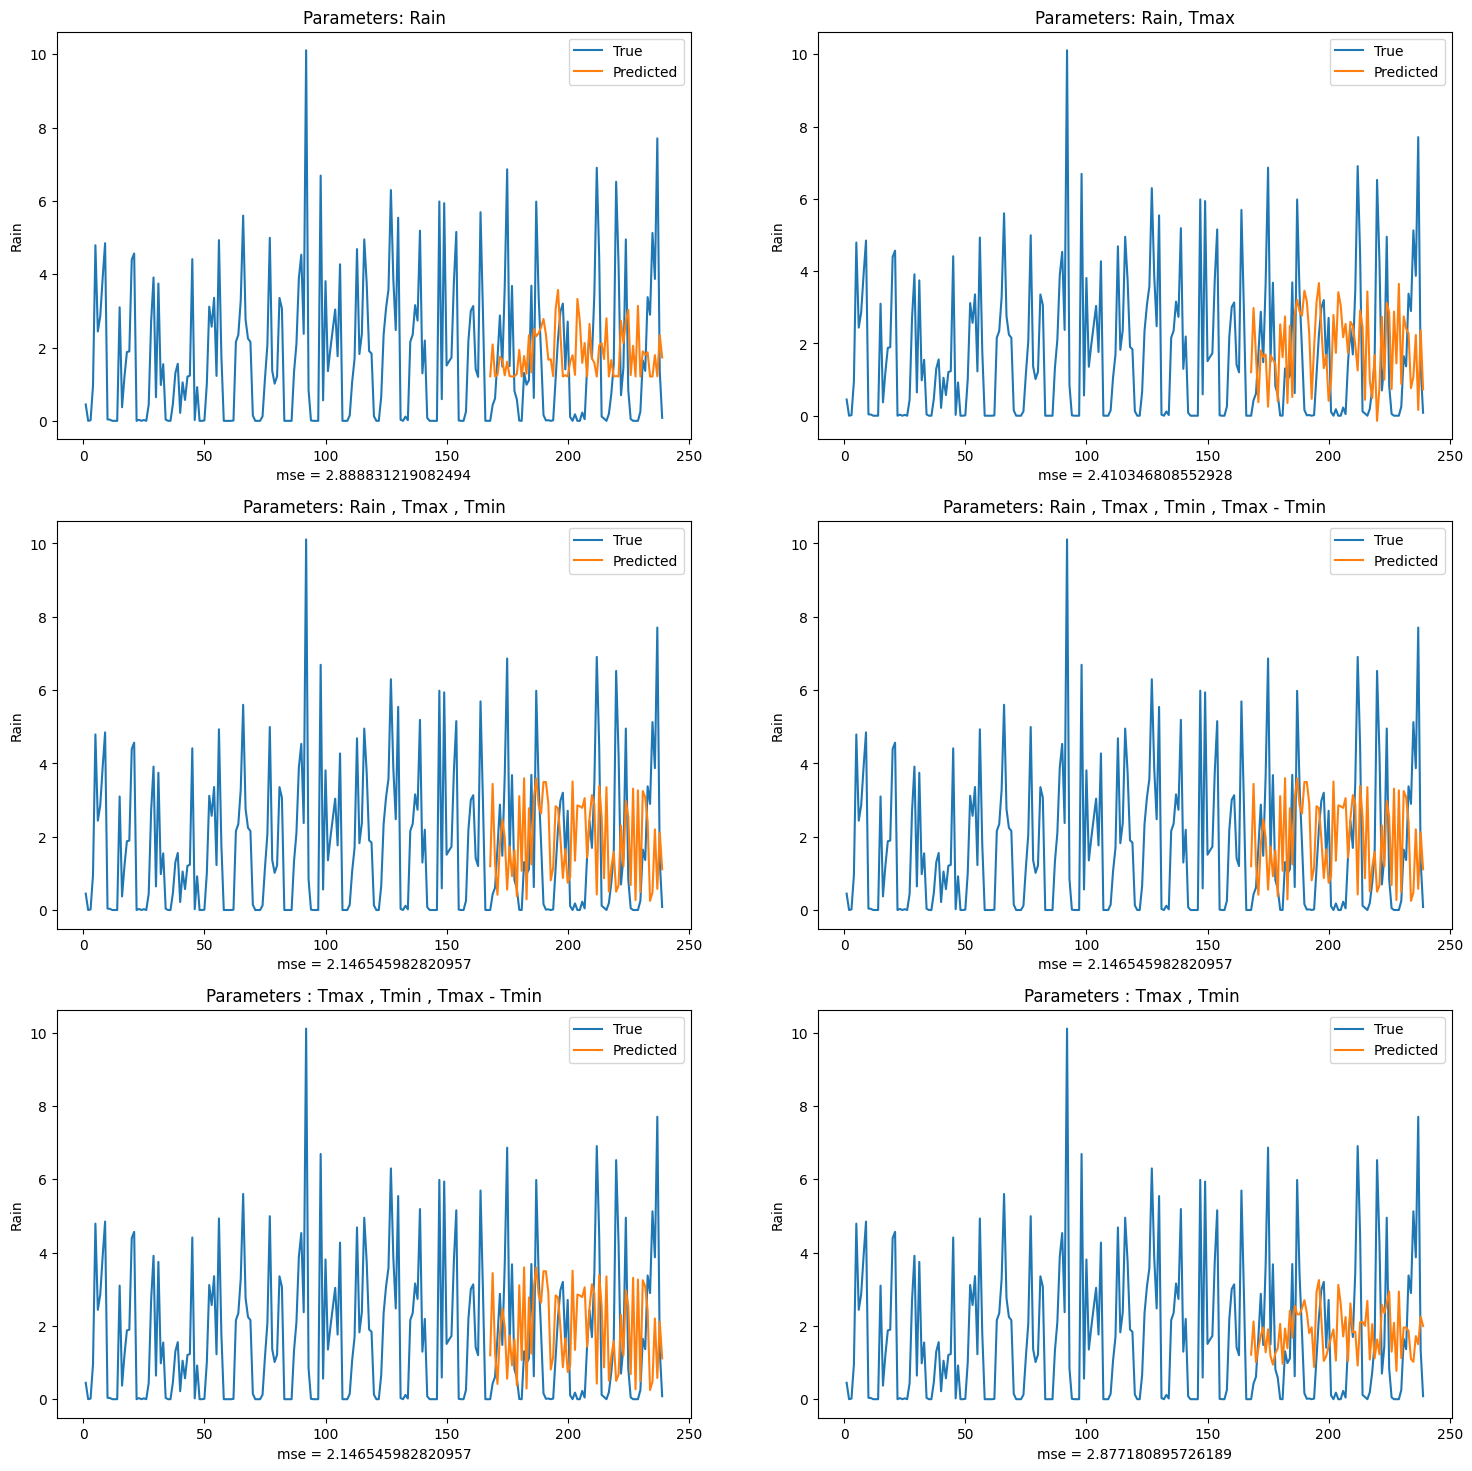

In [442]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2 , figsize = (18, 18))

ax1.plot(loc['monthID'] , loc['pre_rain_mean'] , label = 'True')
ax1.plot(loc['monthID'][167:239] , predicted[0], label = 'Predicted')
ax1.set_title('Parameters: Rain')
ax1.set(xlabel=f'mse = {MSE[0]}', ylabel='Rain')
ax1.legend()

ax2.plot(loc['monthID'] , loc['pre_rain_mean'] , label = 'True')
ax2.plot(loc['monthID'][167:239] , predicted[1], label = 'Predicted')
ax2.set_title('Parameters: Rain, Tmax')
ax2.set(xlabel=f'mse = {MSE[1]}', ylabel='Rain')
ax2.legend()

ax3.plot(loc['monthID'] , loc['pre_rain_mean'] , label = 'True')
ax3.plot(loc['monthID'][167:239] , predicted[2], label = 'Predicted')
ax3.set_title('Parameters: Rain , Tmax , Tmin')
ax3.set(xlabel=f'mse = {MSE[2]}', ylabel='Rain')
ax3.legend()

ax4.plot(loc['monthID'] , loc['pre_rain_mean'] , label = 'True')
ax4.plot(loc['monthID'][167:239] , predicted[3], label = 'Predicted')
ax4.set_title('Parameters: Rain , Tmax , Tmin , Tmax - Tmin')
ax4.set(xlabel=f'mse = {MSE[3]}', ylabel='Rain')
ax4.legend()

ax5.plot(loc['monthID'] , loc['pre_rain_mean'] , label = 'True')
ax5.plot(loc['monthID'][167:239] , predicted[4], label = 'Predicted')
ax5.set_title('Parameters : Tmax , Tmin , Tmax - Tmin')
ax5.set(xlabel=f'mse = {MSE[4]}', ylabel='Rain')
ax5.legend()

ax6.plot(loc['monthID'] , loc['pre_rain_mean'] , label = 'True')
ax6.plot(loc['monthID'][167:239] , predicted[5], label = 'Predicted')
ax6.set_title('Parameters : Tmax , Tmin ')
ax6.set(xlabel=f'mse = {MSE[5]}', ylabel='Rain')
ax6.legend()

plt.show()

In [443]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
df = pd.read_csv('imd_daily_train.csv', compression='gzip')
df.head()

,day,pos,rain,tmin,tmax
0,0,"(10.5, 76.5)",0.0,15.730000,28.129999
1,0,"(10.5, 77.5)",0.0,16.520000,27.809999
2,0,"(10.5, 78.5)",0.0,20.450001,29.860001
3,0,"(10.5, 79.5)",0.0,21.350000,29.049999
4,0,"(11.5, 75.5)",0.0,16.650000,28.510000


In [444]:
df = df.join(df.groupby('pos').shift(-1)[['rain','tmin','tmax']].add_prefix('pre_')).dropna()

In [446]:
df['pre_tmax - pre_tmin'] = df.apply(lambda row: row['pre_tmax'] - row['pre_tmin'], axis=1)
df.tail()

,day,pos,rain,tmin,tmax,pre_rain,pre_tmin,pre_tmax,pre_tmax - pre_tmin
2191195,7303,"(35.5, 77.5)",0.0,-3.843366,7.326624,0.0,-3.100608,7.222953,10.323561
2191196,7303,"(8.5, 77.5)",0.0,23.403820,31.892456,0.0,23.855255,31.736881,7.881626
2191197,7303,"(9.5, 76.5)",0.0,22.045404,31.045681,0.0,22.614063,30.767120,8.153057
2191198,7303,"(9.5, 77.5)",0.0,21.875902,30.621803,0.0,22.492508,30.406359,7.913851
2191199,7303,"(9.5, 78.5)",0.0,21.370045,29.423368,0.0,21.653872,29.620565,7.966694


In [448]:
df['uniquepos'] = df['pos'].map({pos: i for i, pos in enumerate(df['pos'].unique())})





In [451]:
def linearregg(X , y):
    # split data into train-test set

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

    # creating an object of LinearRegression class
    LR = LinearRegression()

    # fitting the training data
    LR.fit(x_train,y_train)

    # making predictions
    y_prediction =  LR.predict(x_test)

    mse = mean_squared_error(y_test ,y_prediction )

    return y_prediction , mse ,LR

In [452]:
df['uniquepos'] = df['pos'].map({pos: i for i, pos in enumerate(df['pos'].unique())})
df['uniquepos']

,uniquepos
0,0
1,1
2,2
3,3
4,4
...,...
2191195,295
2191196,296
2191197,297
2191198,298


In [453]:
df = df.dropna()

In [454]:
df.head()


,day,pos,rain,tmin,tmax,pre_rain,pre_tmin,pre_tmax,pre_tmax - pre_tmin,uniquepos
0,0,"(10.5, 76.5)",0.0,15.730000,28.129999,0.0,15.600000,27.610001,12.010000,0
1,0,"(10.5, 77.5)",0.0,16.520000,27.809999,0.0,16.299999,27.330000,11.030001,1
2,0,"(10.5, 78.5)",0.0,20.450001,29.860001,0.0,19.530001,29.969999,10.439999,2
3,0,"(10.5, 79.5)",0.0,21.350000,29.049999,0.0,20.570000,29.290001,8.720001,3
4,0,"(11.5, 75.5)",0.0,16.650000,28.510000,0.0,17.010000,28.120001,11.110001,4


In [455]:
df.tail()

,day,pos,rain,tmin,tmax,pre_rain,pre_tmin,pre_tmax,pre_tmax - pre_tmin,uniquepos
2191195,7303,"(35.5, 77.5)",0.0,-3.843366,7.326624,0.0,-3.100608,7.222953,10.323561,295
2191196,7303,"(8.5, 77.5)",0.0,23.403820,31.892456,0.0,23.855255,31.736881,7.881626,296
2191197,7303,"(9.5, 76.5)",0.0,22.045404,31.045681,0.0,22.614063,30.767120,8.153057,297
2191198,7303,"(9.5, 77.5)",0.0,21.875902,30.621803,0.0,22.492508,30.406359,7.913851,298
2191199,7303,"(9.5, 78.5)",0.0,21.370045,29.423368,0.0,21.653872,29.620565,7.966694,299


In [458]:
# Creating differnt independent variables
X = []
y = []
#loc = df.loc[(df['pos'] == "(15.5, 75.5)") ]
for z in range(300):
  loc = df.loc[df['uniquepos'] == z]
  X.append ([loc[['pre_rain']],
      loc[['pre_rain' , 'pre_tmax']],
      loc[['pre_rain' , 'pre_tmax' , 'pre_tmin']],
      loc[['pre_rain' , 'pre_tmax' , 'pre_tmin' , 'pre_tmax - pre_tmin']],
      loc[['pre_tmax' , 'pre_tmin' , 'pre_tmax - pre_tmin']],
      loc[['pre_tmax' , 'pre_tmin']]
      ])
  y.append(loc['rain'])

In [ ]:
df.tail()

,day,pos,rain,tmin,tmax,pre_rain,pre_tmin,pre_tmax,pre_tmax - pre_tmin,uniquepos
2191195,7303,"(35.5, 77.5)",0.0,-3.843366,7.326624,0.0,-3.100608,7.222953,10.323561,295
2191196,7303,"(8.5, 77.5)",0.0,23.403820,31.892456,0.0,23.855255,31.736881,7.881626,296
2191197,7303,"(9.5, 76.5)",0.0,22.045404,31.045681,0.0,22.614063,30.767120,8.153057,297
2191198,7303,"(9.5, 77.5)",0.0,21.875902,30.621803,0.0,22.492508,30.406359,7.913851,298
2191199,7303,"(9.5, 78.5)",0.0,21.370045,29.423368,0.0,21.653872,29.620565,7.966694,299


In [ ]:
df.tail()

,day,pos,rain,tmin,tmax,pre_rain,pre_tmin,pre_tmax,pre_tmax - pre_tmin,uniquepos
2191195,7303,"(35.5, 77.5)",0.0,-3.843366,7.326624,0.0,-3.100608,7.222953,10.323561,295
2191196,7303,"(8.5, 77.5)",0.0,23.403820,31.892456,0.0,23.855255,31.736881,7.881626,296
2191197,7303,"(9.5, 76.5)",0.0,22.045404,31.045681,0.0,22.614063,30.767120,8.153057,297
2191198,7303,"(9.5, 77.5)",0.0,21.875902,30.621803,0.0,22.492508,30.406359,7.913851,298
2191199,7303,"(9.5, 78.5)",0.0,21.370045,29.423368,0.0,21.653872,29.620565,7.966694,299


In [459]:
import csv
f = open('outputdata', 'w')

# create the csv writer
writer = csv.writer(f)
writer.writerow(['position', 'LRcoef_rain','LRcoef_tmax','LRcoef_tmin','LRintercept'])

58

In [460]:
predicted = []
MSE = []
LRvalue = []
for r in range(300):
  for i in X[r]:
      predd , mse , LRdata = linearregg(i , y[r])
      predd = list(predd)
      predd = np.array(predd)
      #print('LR Coefficients: \n', LRdata.coef_)
      #print('LR Intercept: \n', LRdata.intercept_)
      # write a row to the csv file
      #writer.writerow([LRdata.coef_,LRdata.intercept_])
      #writer.writerow(LRdata.coef_
      #writer.writerow(LRdata.intercept_)
      LRvalue.append(LRdata)
      predicted.append(predd)
      MSE.append(mse)


  position = df.loc[df['uniquepos'].eq(r)]['pos'].unique()
  writer.writerow([position, LRvalue[2].coef_,LRvalue[2].intercept_])

In [ ]:
predicted[0].shape


(2192,)

In [462]:



# close the file
f.close()

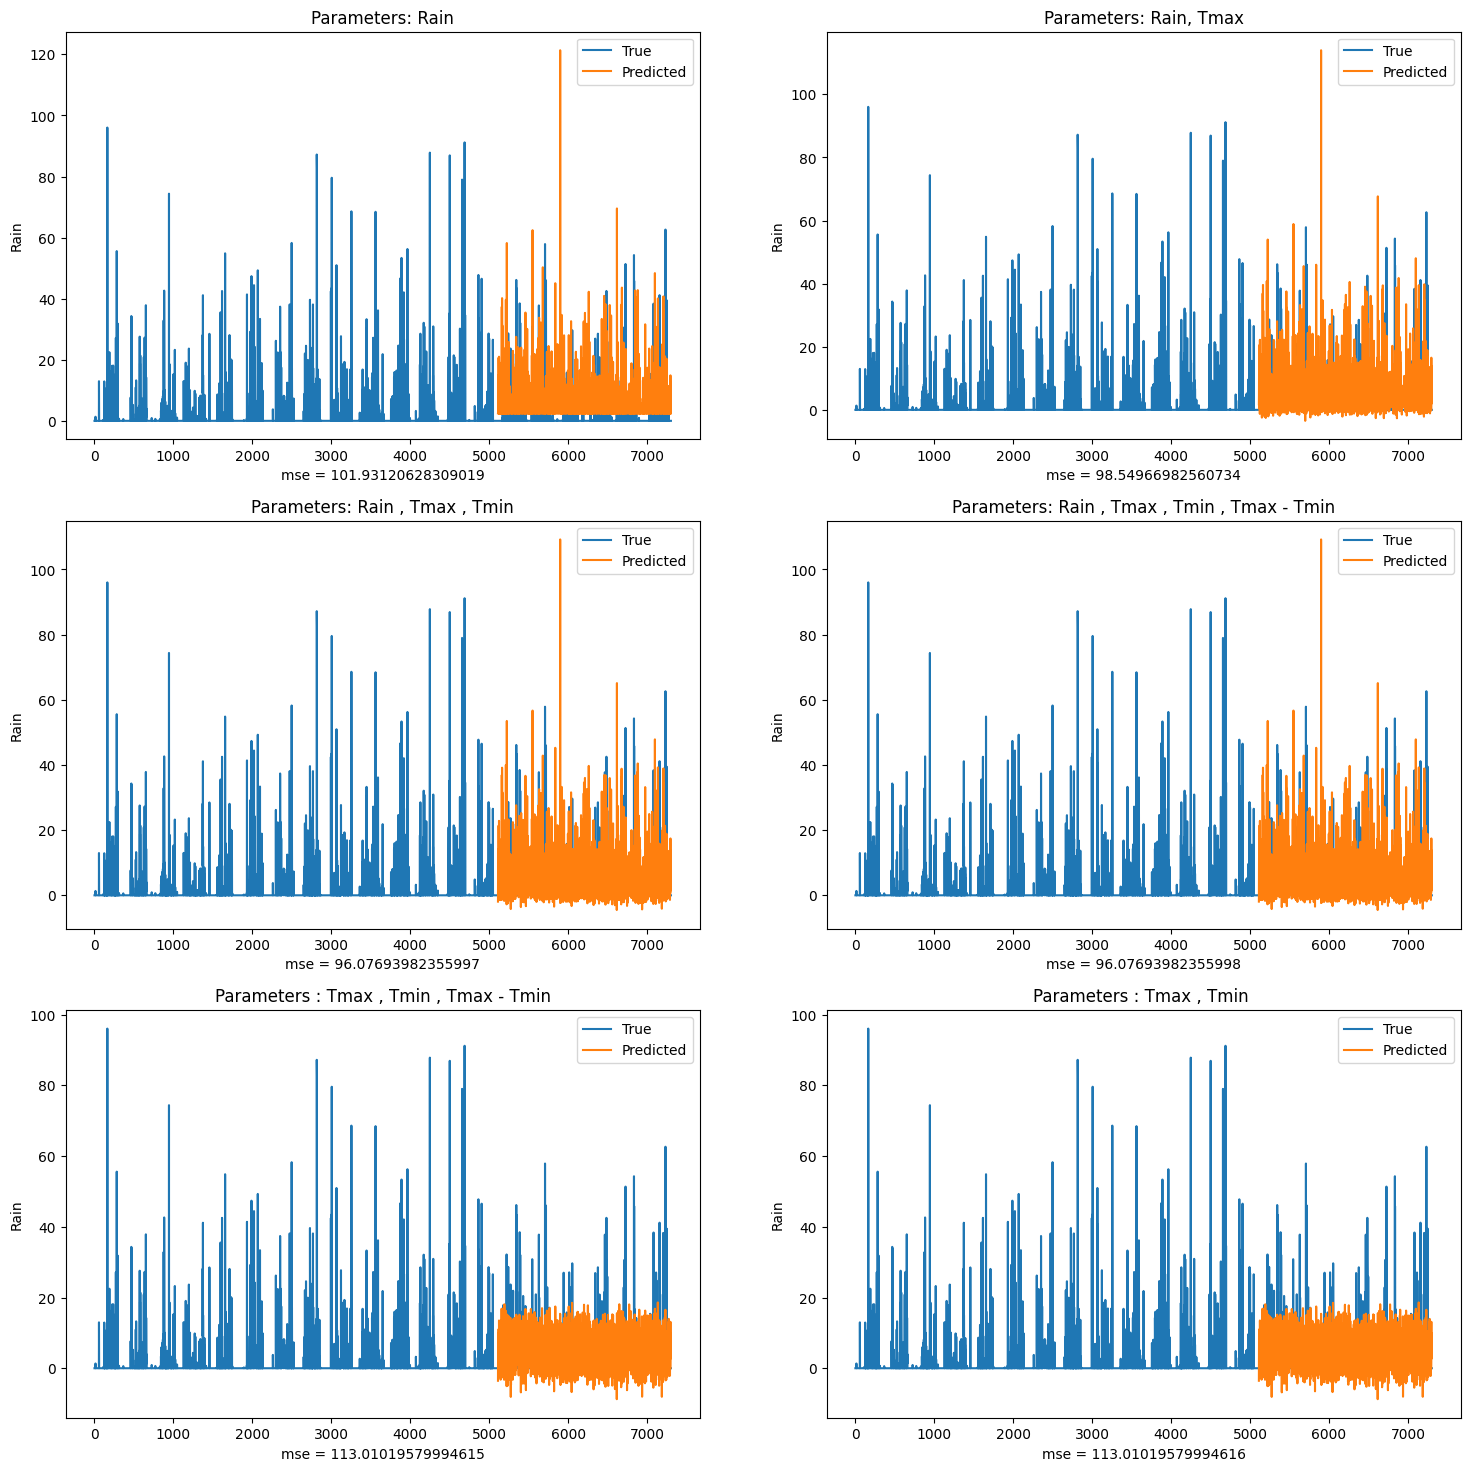

In [461]:
loc = df.loc[(df['pos'] == "(15.5, 75.5)") ]


fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2 , figsize = (18, 18))

ax1.plot(loc['day'] , loc['rain'] , label = 'True')
ax1.plot(loc['day'][5112:7304] , predicted[0], label = 'Predicted')
ax1.set_title('Parameters: Rain')
ax1.set(xlabel=f'mse = {MSE[0]}', ylabel='Rain')
ax1.legend()

ax2.plot(loc['day'] , loc['rain'] , label = 'True')
ax2.plot(loc['day'][5112:7304] , predicted[1], label = 'Predicted')
ax2.set_title('Parameters: Rain, Tmax')
ax2.set(xlabel=f'mse = {MSE[1]}', ylabel='Rain')
ax2.legend()

ax3.plot(loc['day'] , loc['rain'] , label = 'True')
ax3.plot(loc['day'][5112:7304] , predicted[2], label = 'Predicted')
ax3.set_title('Parameters: Rain , Tmax , Tmin')
ax3.set(xlabel=f'mse = {MSE[2]}', ylabel='Rain')
ax3.legend()

ax4.plot(loc['day'] , loc['rain'] , label = 'True')
ax4.plot(loc['day'][5112:7304] , predicted[3], label = 'Predicted')
ax4.set_title('Parameters: Rain , Tmax , Tmin , Tmax - Tmin')
ax4.set(xlabel=f'mse = {MSE[3]}', ylabel='Rain')
ax4.legend()

ax5.plot(loc['day'] , loc['rain'] , label = 'True')
ax5.plot(loc['day'][5112:7304] , predicted[4], label = 'Predicted')
ax5.set_title('Parameters : Tmax , Tmin , Tmax - Tmin')
ax5.set(xlabel=f'mse = {MSE[4]}', ylabel='Rain')
ax5.legend()

ax6.plot(loc['day'] , loc['rain'] , label = 'True')
ax6.plot(loc['day'][5112:7304] , predicted[5], label = 'Predicted')
ax6.set_title('Parameters : Tmax , Tmin ')
ax6.set(xlabel=f'mse = {MSE[5]}', ylabel='Rain')
ax6.legend()

plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
df = pd.read_csv('imd_daily_train.csv', compression='gzip')
df.head()

In [ ]:
df['week'] = df.apply(lambda row: row['day']%7, axis=1)
df.head()
df.tail()

In [ ]:
df['tmax - tmin'] = df.apply(lambda row: row['tmax'] - row['tmin'], axis=1)
df.tail()

In [ ]:
def linearregg(X , y):
    # split data into train-test set
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

    # creating an object of LinearRegression class
    LR = LinearRegression()

    # fitting the training data
    LR.fit(x_train,y_train)

    # making predictions
    y_prediction =  LR.predict(x_test)

    mse = mean_squared_error(y_test ,y_prediction )

    return y_prediction , mse

In [ ]:
# Creating differnt independent variables
loc = df.loc[(df['pos'] == "(15.5, 75.5)") ]
X = [loc[['rain']],
    loc[['rain' , 'tmax']],
    loc[['rain' , 'tmax' , 'tmin']],
    loc[['rain' , 'tmax' , 'tmin' , 'tmax - tmin']],
    loc[['rain' , 'tmin' , 'tmax - tmin']],
    loc[['rain' , 'tmin']]
    ]

y = loc['rain']

In [ ]:
predicted = []
MSE = []

for i in X:
    predd , mse = linearregg(i , y)
    predd = list(predd)
    predd = np.array(predd)

    predicted.append(predd)
    MSE.append(mse)

In [ ]:
predicted[0].shape

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2 , figsize = (18, 18))

ax1.plot(loc['week'] , loc['rain'] , label = 'True')
ax1.plot(loc['week'][5112:7304] , predicted[0], label = 'Predicted')
ax1.set_title('Parameters: Rain')
ax1.set(xlabel=f'mse = {MSE[0]}', ylabel='Rain')
ax1.legend()

ax2.plot(loc['week'] , loc['rain'] , label = 'True')
ax2.plot(loc['week'][5112:7304] , predicted[1], label = 'Predicted')
ax2.set_title('Parameters: Rain, Tmax')
ax2.set(xlabel=f'mse = {MSE[1]}', ylabel='Rain')
ax2.legend()

ax3.plot(loc['week'] , loc['rain'] , label = 'True')
ax3.plot(loc['week'][5112:7304] , predicted[2], label = 'Predicted')
ax3.set_title('Parameters: Rain , Tmax , Tmin')
ax3.set(xlabel=f'mse = {MSE[2]}', ylabel='Rain')
ax3.legend()

ax4.plot(loc['week'] , loc['rain'] , label = 'True')
ax4.plot(loc['week'][5112:7304] , predicted[3], label = 'Predicted')
ax4.set_title('Parameters: Rain , Tmax , Tmin , Tmax - Tmin')
ax4.set(xlabel=f'mse = {MSE[3]}', ylabel='Rain')
ax4.legend()

ax5.plot(loc['week'] , loc['rain'] , label = 'True')
ax5.plot(loc['week'][5112:7304] , predicted[4], label = 'Predicted')
ax5.set_title('Parameters : Tmax , Tmin , Tmax - Tmin')
ax5.set(xlabel=f'mse = {MSE[4]}', ylabel='Rain')
ax5.legend()

ax6.plot(loc['week'] , loc['rain'] , label = 'True')
ax6.plot(loc['week'][5112:7304] , predicted[5], label = 'Predicted')
ax6.set_title('Parameters : Tmax , Tmin ')
ax6.set(xlabel=f'mse = {MSE[5]}', ylabel='Rain')
ax6.legend()

plt.show()